#Problem

->In the competitive food delivery industry, businesses often struggle to understand and
engage their diverse user base effectively. Users differ widely in terms of age, spending
habits, order frequency, app usage, and preferences. Without segmenting these users into
meaningful groups, companies miss opportunities to personalize marketing, improve user
satisfaction, and increase retention.

#Objective and Goals

#Goals:
->To perform concepts of unsupervised learning.
->Find patterns in Food delivery system dataset to maximize the sales.
->to segment users of a food delivery app into meaningful
clusters based on their behavior and demographics using unsupervised learning techniques.
By identifying distinct customer groups, the business can tailor marketing campaigns,
improve service offerings, and optimize customer engagement strategies.

#Objective:

#Data Understanding & Exploration
1. Load and inspect food delivery user data to understand variable types (e.g., numeric
vs. categorical), ranges, and distributions.
2. Summarize and interpret key statistical properties (mean, median, standard
deviation, skewness) of user behavior features like Age, Total Orders, Average
Spend, etc.
3. Visualize data distributions using histograms, box plots, and pair plots to explore
potential groupings or outliers.
4. Identify relationships between user variables (e.g., App Usage Time and Average
Spend) through correlation matrices and scatter plots.
#Data Cleaning & Preprocessing
5. Drop or encode irrelevant or categorical features (e.g., UserID, FavoriteCuisine) as
appropriate for unsupervised learning models.
6. Standardize numerical features using StandardScaler to ensure equal contribution to
distance-based clustering.
7. Evaluate the effect of scaling and dimensionality reduction on the data’s structure
through pre- and post-processing visualizations.
#Dimensionality Reduction with PCA
8. Apply Principal Component Analysis (PCA) to reduce high-dimensional data to 2D
for effective visualization of user clusters.
9. Interpret principal components by examining feature loadings to understand which
user behaviors contribute most to variance.
10. Visualize PCA-transformed data to observe potential natural clusters and separation
of user types.
#Unsupervised Learning: Clustering
11. Implement K-Means clustering on scaled user data and interpret resulting clusters in
the context of user behavior.
12. Determine the optimal number of clusters using the Elbow Method or Silhouette
Score.
13. Apply Agglomerative (Hierarchical) Clustering and visualize results using
dendrograms to understand hierarchical relationships among users.
14. Compare clustering results from K-Means and Hierarchical Clustering to identify
consistency or divergence in groupings.
#Model Evaluation & Visualization
15. Label PCA scatter plots with cluster assignments to visually interpret how users are
grouped in reduced dimensions.
16. Analyze cluster characteristics by computing average values of features within each
cluster (e.g., high spenders, frequent users).
17. Create a cluster profile summary to describe each segment using business-relevant
insights (e.g., “young frequent users,” “older high spenders”).
#Critical Thinking & Real-world Framing
18. Frame the clustering output as a customer segmentation strategy for personalized
marketing or product recommendations.
19. Explain how unsupervised learning helps businesses make data-driven decisions in
the absence of labeled training data.
20. Reflect on limitations of clustering models (e.g., sensitivity to scaling, shape of
clusters) and suggest ways to improve (e.g., DBSCAN, inclusion of more behavioral
data).





#Step 1 – Importing Libraries
1. pandas-Load and view your dataset like a spreadsheet
2. StandardScaler-Prepare your data so numbers are on the same scale
3. PCA (Principal Component Analysis)- Shrink your dataset to just 2 main features so you can visualize it
4. KMeans, AgglomerativeClustering,DBSCAN- Try different ways to group similar users together
5. dendrogram, linkage-  Show a tree of how users are grouped in a hierarchy
6. matplotlib, seaborn-  Create beautiful graphs to understand your results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 2 – Load Data
-> In this part of the project, you will open the dataset, look at the first few rows, and understand what kind of data

-> you are working with. Think of it like opening a file for the first time and scanning through the first page to get a sense of what’s inside.
You are working with a file called food_delivery.csv. This file contains data about customers
using a food delivery app.
Each row in the file represents one customer, and each column describes some detail about
that customer — for example:
• How many times they’ve ordered
• How much they usually spend
• What kind of food they like
This file is saved in a common format called CSV (Comma-Separated Values). It’s like an
Excel sheet where each row is a customer and each column is a piece of information.

Step 1: Load the File into Your Data Tool
• Open your data analysis tool (like Jupyter Notebook or Google Colab).
• Use the tool’s option to read or upload the food_delivery.csv file.
• Once loaded, the dataset will be stored in a table format called a DataFrame — think
of it like a smart version of an Excel table.

Step 2: View the First 5 Rows
• Use your tool to display the first 5 rows of the dataset.
• This is called a “data preview.”
• You’ll see a table with customer details, and it will help you understand:
o What kind of information is available
o Whether the data loaded correctly
o What the column names are (e.g., UserID, TotalOrders, AvgSpend, etc.)

In [ ]:
df=pd.read_csv('food_delivery.csv')
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


#Step 3: Check for Missing Values in Your Data

->In this step, you will check your dataset for missing values — empty or blank cells where  important information may be missing. This is a crucial step before doing any serious data analysis or clustering.


Imagine you’re organizing a school event and you have a list of participants. If someone forgot to fill in their name or dietary preferences,it might lead to confusion or mistakes.The same happens in data analysis:

• Missing values can lead to incorrect results
• Some machine learning models might even fail to run

• You might make wrong assumptions about your users

So, before doing anything else — you need to ask:
“Do I have all the information I need for every user?”

Step-by-Step

Step 1: Run a Check for Missing Data

• You will run a simple command that scans every column in your dataset.

• It will count how many values are missing (if any) in each column.

In [ ]:
df.isna().sum()

,0
UserID,0
Age,0
TotalOrders,0
AverageSpend,0
FavoriteCuisine,0
DeliveryRating,0
AppUsageTimePerDay,0


#Step 4 –Summary Statistics
 In this step, you’ll take a quick overview of your entire dataset by generating summary statistics. This helps you understand the shape, spread, and patterns in your data before  moving on to clustering or modeling.

Step-by-Step Instructions

Step 1: Generate the Summary Statistics
• Use your data tool (like Jupyter or Colab) to summarize all numeric columns in the
dataset.

• You will get statistics like:

1.  Count – how many users have values in that column
2.  Mean – the average value (e.g., average age, average spend)
3.  Standard Deviation – how much the values vary from the average
4.  Minimum and Maximum – the smallest and largest value
5.  Percentiles (25%, 50%, 75%) – tells you how values are spread out (like
what’s “typical”)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


-> find if duplicated value is there

In [ ]:
df.duplicated().sum()

np.int64(0)

-> what is the  shape of dataset(rows and columns)

In [ ]:
df.shape

(500, 7)

In [ ]:
df.describe(include='O')

,FavoriteCuisine
count,500
unique,5
top,Thai
freq,108


#Step 5: Keep Only Useful Columns
In this step, you will remove columns that are not useful for analysis and keep only the important ones that will help you group users based on similar behavior. This prepares your data for the next steps like scaling and clustering.

Imagine you’re organizing students into groups for a class project. Would you group them
based on:

• their name tags (like “Student #42”)?
• or their actual skills and interests?

Of course, you’d use real information — not random ID numbers.
Similarly, in this project, you want to cluster users based on:

• how often they order,
• how much they spend,
• how long they use the app,
• and how happy they are with deliveries.
You do not want to use columns like:
• User ID (just a unique number)
• Favorite Cuisine (text, not a number — and we’re not analyzing it right now)
1. Review Your Dataset Columns
• Take a moment to look at all the columns in your dataset.
• Ask yourself: “Which columns describe user behavior in numbers?”
• You’re likely to see columns like:

o Age
o Total Orders
o Average Spend
o Delivery Rating
o App Usage Time
2. Identify Columns to Remove
• You should remove columns that are:

o Just labels (e.g., UserID)
o Text-based (e.g., FavoriteCuisine) — because clustering methods work best
with numbers
3. Create a Clean Version of the Data
• After removing the unhelpful columns, your dataset is now clean and ready for the
next steps.
• Save this cleaned version separately (often given a name like X) so that:

o You don’t affect the original dataset
o You use only the useful numeric data for further analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fav_cuisine']=le.fit_transform(df['FavoriteCuisine'])
df

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay,fav_cuisine
0,1,56,37,312.70,Mexican,4.6,20.9,3
1,2,46,34,193.97,Mexican,3.0,150.2,3
2,3,32,22,291.66,Mexican,4.1,59.7,3
3,4,25,30,232.21,Thai,3.7,85.5,4
4,5,38,27,244.84,Italian,4.7,13.7,2
...,...,...,...,...,...,...,...,...
495,496,56,30,398.62,Thai,4.3,150.7,4
496,497,49,27,423.00,Chinese,3.6,39.0,0
497,498,41,31,355.66,Thai,3.6,15.2,4
498,499,40,29,305.66,Thai,4.1,44.8,4


In [ ]:
df1=df.drop(['FavoriteCuisine'],axis=1)
df1

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay,fav_cuisine
0,1,56,37,312.70,4.6,20.9,3
1,2,46,34,193.97,3.0,150.2,3
2,3,32,22,291.66,4.1,59.7,3
3,4,25,30,232.21,3.7,85.5,4
4,5,38,27,244.84,4.7,13.7,2
...,...,...,...,...,...,...,...
495,496,56,30,398.62,4.3,150.7,4
496,497,49,27,423.00,3.6,39.0,0
497,498,41,31,355.66,3.6,15.2,4
498,499,40,29,305.66,4.1,44.8,4


<Axes: >

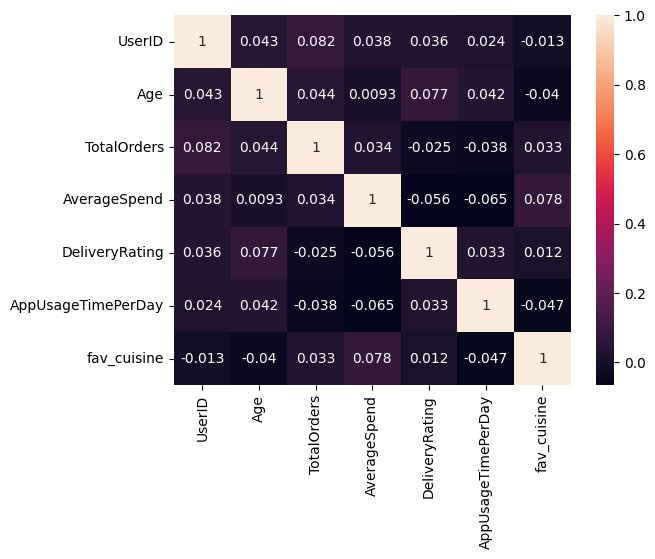

In [ ]:
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [ ]:
X=df1.drop('UserID',axis=1)

#Step 6: Standardize Your Data
In this step, you will standardize (or scale) your data so that all the features (like age, total orders, app usage, etc.) are on the same scale.This ensures that no single column unfairly
influences your clustering results just because it has bigger numbers.

Imagine you're forming student groups for a workshop. You want to group students based on:

• Their age
• Their grades
• And their hours of volunteering
Now, suppose:
• Age ranges from 18 to 60
• Grades range from 0 to 100
• Volunteering hours range from 0 to 500

If you group them directly based on these numbers, volunteering hours will dominate, just
because the numbers are bigger — not necessarily because they’re more important.
This is why we scale all the values so they’re fair and equal before we group people.

1. Understand What Standardization Means
• Standardization means transforming all values so that:

o The average becomes 0
o The spread of the values becomes 1

• It keeps the shape of the data but puts all columns on the same scale.
2. Apply Standardization to the Cleaned Data
  • You will use a tool to look at each column, learn the average and variation, and then
  adjust all the numbers accordingly.
  • After this, every feature (like age, spend, orders) will have numbers around 0 — with
  negative numbers for below-average values and positive numbers for above-average
  values.

3. Save This New Scaled Data for Later Use
• This newly standardized version of your data will be saved into a new table.
• This is what you will use for clustering in upcoming steps.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

#Step 7: Reduce Dimensions Using PCA
In this step, you will simplify your dataset by reducing it from many columns (or features) to just two main features using a method called Principal Component Analysis (PCA).
This makes your data:

• Easier to visualize
• Faster to process
• And still rich with useful patterns
Imagine you’re trying to describe every customer using 5 or 6 details like:
• Age
• Total orders
• Average spend
• Delivery rating
• App usage time

That’s a lot to look at all at once. PCA helps by saying:
"Let’s find just two powerful features that summarize most of this information."These new features are combinations of the original ones but still reflect the overall behavior of each customer.
Step by Step Instructions
1. Choose How Many Features to Keep
• Decide to keep just 2 new features (called principal components).
• These components will represent most of the variation (differences) in the user data.
2. Let PCA Analyze Your Scaled Data
• PCA looks at your already scaled data and finds which directions (or combinations of features) explain the most.
• For example, PCA might combine "App usage time" and "Average spend" into a new
feature that represents "User engagement level".
3. Replace the Original Data with the Simplified Version
• After PCA is done, each user will now have 2 new values (instead of 5 or 6).
• These values are easier to visualize in a 2D chart and still capture most of the behavior patterns.
Example
Imagine you're describing cities. Instead of listing:
• Population
• Number of cars
• Pollution level
• Traffic speed
You summarize it in just 2 terms:
1. Urban intensity
2. Transport efficiency
That’s what PCA does — it simplifies complex things into fewer, powerful insights.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)

#Step 8: Group Users Using KMeans Clustering
In this step, you will use a technique called KMeans Clustering to group your app users into 3 clusters (or user segments) based on their behaviors like spending, app usage, order history, and ratings.

This helps answer questions like:

“Are there different types of users in our dataset — like budget buyers, frequent users, or
loyal customers?”

What Is Clustering?

Clustering is a way of grouping people or things based on how similar they are.
Real-world example:
Think of organizing books in a library:

• Fiction in one section
• Biographies in another
• Science books in a third
You don’t label every book yourself — you look at the content and decide what group it fits into.

KMeans does something similar with your users:

It analyzes their behavior and automatically groups them into categories — without you
having to label anything.

Step by Step Instructions

1. Decide How Many Groups You Want
• You will ask the tool to create 3 groups (clusters).
• This is like saying: “I want to divide users into 3 customer types based on their
behavior.”
2. Let the Tool Analyze and Group the Users
• The tool will:

    o Look at the scaled data you prepared earlier
    o Measure how similar or different users are from one another
    o Group them based on those patterns
    Every user will now be assigned to one of the 3 groups.

3. Save the Group Assignments

  • Each user now has a label (like Group 0, Group 1, or Group 2).
  • These labels tell you which group each user belongs to.
  • You will use these labels later when plotting and analyzing the clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)
centroid_pca=pca.transform(kmeans.cluster_centers_)


#Step 9: Visualize the Clusters Using a Scatter Plot
In this step, you will draw a 2D scatter plot to see the user groups (clusters) formed by the KMeans algorithm. This plot helps you visually understand how your app users are
grouped, and how different or similar those groups are.

Step by Step Instructions

1: Set Up the Plot Area

• Think of this as choosing the size of the canvas where your dots (users) will be
placed.
• You’ll decide how wide and tall your plot should be so it’s easy to read.

2. Plot the Users on the Chart

• Each user will appear as a dot based on their two main behavior features (PC1 and
PC2).
• These features are created from the PCA step and represent the overall behavior
patterns of the users.

3. Color the Dots Based on Clusters
• You will use the KMeans results to color-code each user:

  o Cluster 0 (e.g. casual users)
  o Cluster 1 (e.g. loyal users)
  o Cluster 2 (e.g. low-engagement users)

• This makes it easy to see which users are similar and where each group is located.

4. Add Labels and a Title
• Add a title to your chart so others understand what it shows.
• Label your x-axis and y-axis with “PC1” and “PC2”, which represent the behavior
features from PCA.

5. Display the Chart
• Once everything is ready, you’ll display the chart.
• You should now see a colorful scatter plot where users are grouped based on how they behave on the app.

What You Should Expect to See
• A chart with three distinct colors, each representing a different user group.
• Clusters (groups) that are close together suggest similar users.
• If clusters are far apart, it means the behavior differences are bigger.

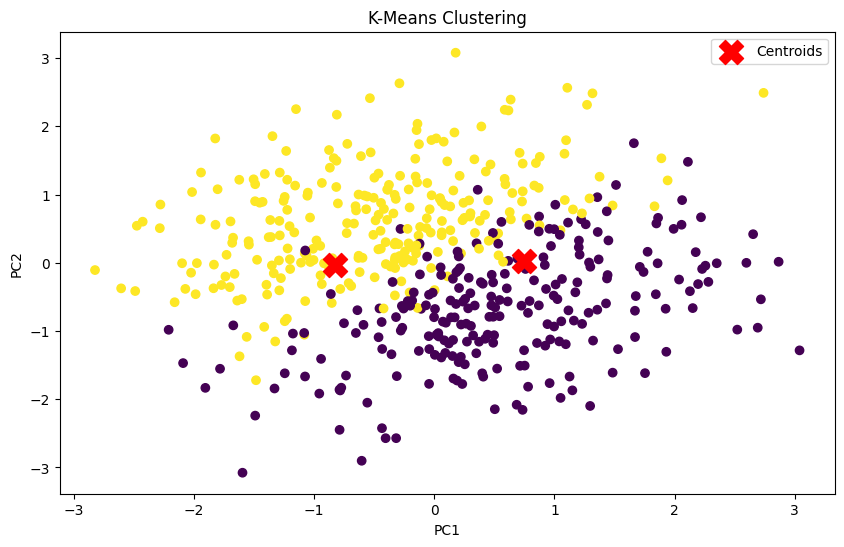

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=kmeans_labels)
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.legend()
plt.show() # Added plt.show() to display the plot

#Step 10: Visualize DBSCAN Clustering with a Scatter Plot
In this step, you’ll create a colorful scatter plot to show how users were grouped using the DBSCAN clustering method. This helps you easily see which users fall into groups and which ones are outliers (users who don’t fit in any group).

• You’ve already applied DBSCAN to group users based on behavior (like spending, app
usage, etc.).
• But numbers alone don’t tell the full story — seeing the clusters visually helps you
understand the patterns better.
• You can also spot outliers instantly — users who act very differently.

Step by Step Instructions:

1. Prepare the Plotting Space

You’ll first set up a “canvas” or drawing space large enough to show your users clearly.
2. Plot the Users on a 2D Graph

• Each dot on the graph will represent one user.
• The position of the dot comes from the PCA transformation, which turns complex

user data into two simple dimensions:

o PC1 (X-axis) = principal component 1
o PC2 (Y-axis) = principal component 2

This way, you can visualize all users in 2D, even if the original data had many features.

3. Color the Users by Their Group (Cluster)
• You’ll color each user according to the DBSCAN group they belong to.
• Same color = same group.
• Outliers (users who don’t belong to any cluster) will be shown in a different color.

4. Add Labels and Show the Plot
• Add a title to explain the chart (“PCA with DBSCAN Clustering”).
• Label the axes to show what PC1 and PC2 mean.
• Add a legend to explain what each color represents.
• Finally, show the plot so you can interpret it.

Example:

Imagine organizing a big party:

• People who chat with each other form groups (clusters).
• Someone sitting alone in the corner? That’s an outlier!
• Your scatter plot is like a seating map that shows who’s part of which friend group

— and who’s sitting alone.

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1.5, min_samples=5)
db_labels=db.fit_predict(X_pca)

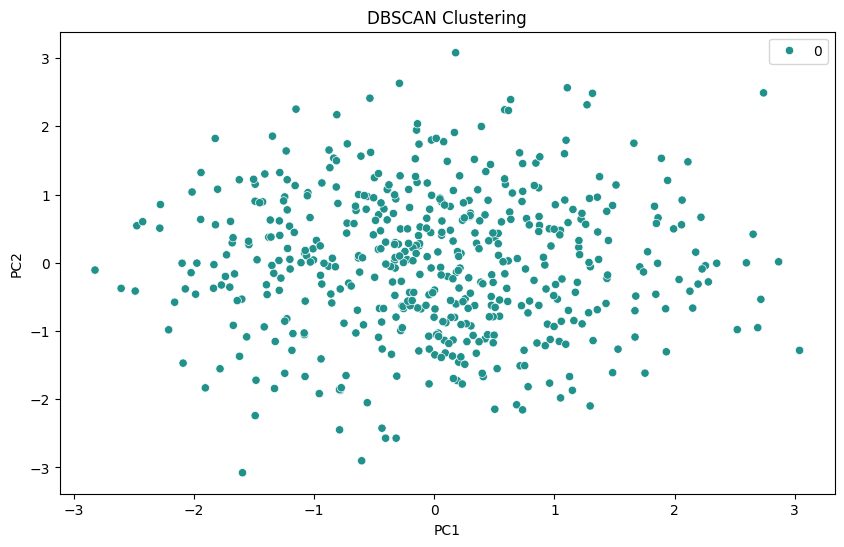

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clustering')
plt.show() # Added plt.show() to display the plot

#Step 11: Build a Dendrogram to Visualize Cluster Formation
In this step, you’ll draw a tree-shaped chart (called a dendrogram) to see how users were grouped together using hierarchical clustering. This tree helps you figure out how similar different users are, and how many meaningful clusters you should keep.

• A dendrogram gives you a zoomed-out view of all the clustering decisions.
• It shows you how and when users merged into groups, from start to finish.
• You can visually decide how many clusters best represent your data.

Think of it like watching how a family tree forms, step by step.
Step by Step Instructions:

1. Prepare the Tree Data

• First, you will use a clustering method to prepare how the tree should be built.
• The computer checks how similar or different each user is from others based on
their behavior (like app usage, spending, delivery rating, etc.).
• Users who are most alike are grouped first. Then groups merge into bigger groups.

2. Set the Chart Size

• You’ll create a wide enough space (like a digital whiteboard) to display your tree
clearly.
• This helps you see how small and big clusters form.

3. Draw the Dendrogram (Tree)

• Now you will plot the tree:

o Each bottom point is a user.
o As you go up, similar users or groups are connected together.

• You’ll only show the last 30 groups to keep the chart readable.
4. Add Labels and Show the Tree

• Add a title and axis labels to explain what your chart shows.
• The Y-axis shows how different users or groups are when they merged.
• Finally, display the chart and observe the patterns.

Example:

Think of arranging books on a shelf:
1. First, group books with the exact same topic (like all history books).
2. Then group similar genres (like all non-fiction).
3. Finally, you place all books into 3 or 4 broad categories.
A dendrogram works the same way — it builds clusters step-by-step, and the tree helps you
decide how many final groups to keep.

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

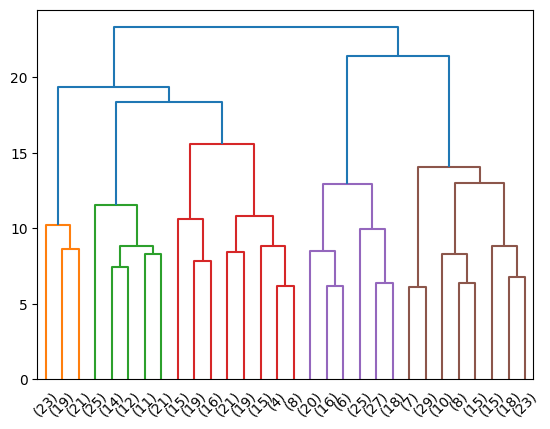

In [ ]:
link=linkage(X,'ward')
dendrogram(link,p=30,truncate_mode='lastp')
plt.show()

#Step 12: Group Users with Agglomerative Clustering
In this step, you will explore a new way to group your users — called Agglomerative
Clustering. This technique helps you understand how users naturally form hierarchies or
step-by-step clusters based on similar behaviors.
Think of it as:

“Let’s start with every user in their own tiny group, and then slowly merge the most similar
ones together until we end up with 3 big clusters.”
Until now, you used KMeans to group users based on behavior. That method finds clusters by jumping straight into dividing users. In this step, you’ll take a different approach:
you’ll build the groups gradually, step by step — like fitting puzzle pieces together.
This helps you:

• See how users naturally combine into small and large groups
• Compare the results of two clustering methods
• Understand which clustering method gives more meaningful insights

Step by Step Instructions
1. Decide the Number of Clusters
  • You will tell the algorithm to create 3 clusters.
  • This means you expect the users to fall into three main types or groups based on
  their behavior.
2. Apply Agglomerative Clustering
• The algorithm starts with every user in their own separate group.
• It looks for the most similar users and joins them together step by step.
• This continues until only 3 big user groups remain.
3. Assign Group Labels to Each User
• After the merging is complete, each user will be assigned a group number (like 0, 1,
or 2).
• This label tells you which group that user belongs to.
4. Save These Labels for Analysis
• These group labels are important because:

    o You’ll use them in your visualizations
    o You can describe how each group behaves
    o You can compare them with the clusters formed by KMeans

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo=AgglomerativeClustering(n_clusters=3)
agglo_labels=agglo.fit_predict(X)

#Step 12: Visualize Clusters Using Agglomerative Clustering
In this step, you will create a scatter plot that shows how users are grouped based on the Agglomerative Clustering algorithm. This helps you understand user behavior visually and compare it with the clusters you saw earlier using KMeans.

Earlier, you grouped users into clusters using a method called Agglomerative Clustering — a technique that builds groups by slowly merging similar users together.

Now, it's time to visualize those groupings in a 2D chart to:

• See how users are grouped together
• Identify patterns in user behavior
• Compare the results with KMeans clustering
• Prepare for interpretation and business insights
Step by Step Instructions

1. Set Up the Plot

• Think of this like choosing the size of the paper or whiteboard where you’ll draw
your scatter plot.
• You’ll make it wide enough to clearly show all the users.
2. Plot Each User as a Dot

• Each dot represents one user in your dataset.
• The horizontal axis (PC1) and vertical axis (PC2) represent the main behavior
patterns, created earlier using PCA.
• These axes help you simplify and visualize multi-feature data in just two dimensions.
3. Add Color to Show Clusters

• You’ll color each dot based on the cluster the user belongs to, using the results from
Agglomerative Clustering.
• For example:
o Blue = Cluster 0
o Gray = Cluster 1
o Red = Cluster 2
• The colors make it easy to see which users belong together.
4. Label the Axes and Add a Title

• Add a title to your chart so it’s clear what you’re showing (e.g., "PCA with
Agglomerative Clustering").
• Label the X-axis as "PC1" and the Y-axis as "PC2" — these are the simplified
dimensions of user behavior.
5. Display the Chart

• Once everything is ready, you'll display the chart.
• Now you can see the clusters visually and begin interpreting them.

Imagine plotting students on a chart where:

• X-axis = how often they study
• Y-axis = how much time they spend relaxing
Now, if you color them by study group, you’ll easily spot:
• Studious students
• Balanced ones
• More relaxed ones

This is exactly what you’re doing — but with food delivery users.

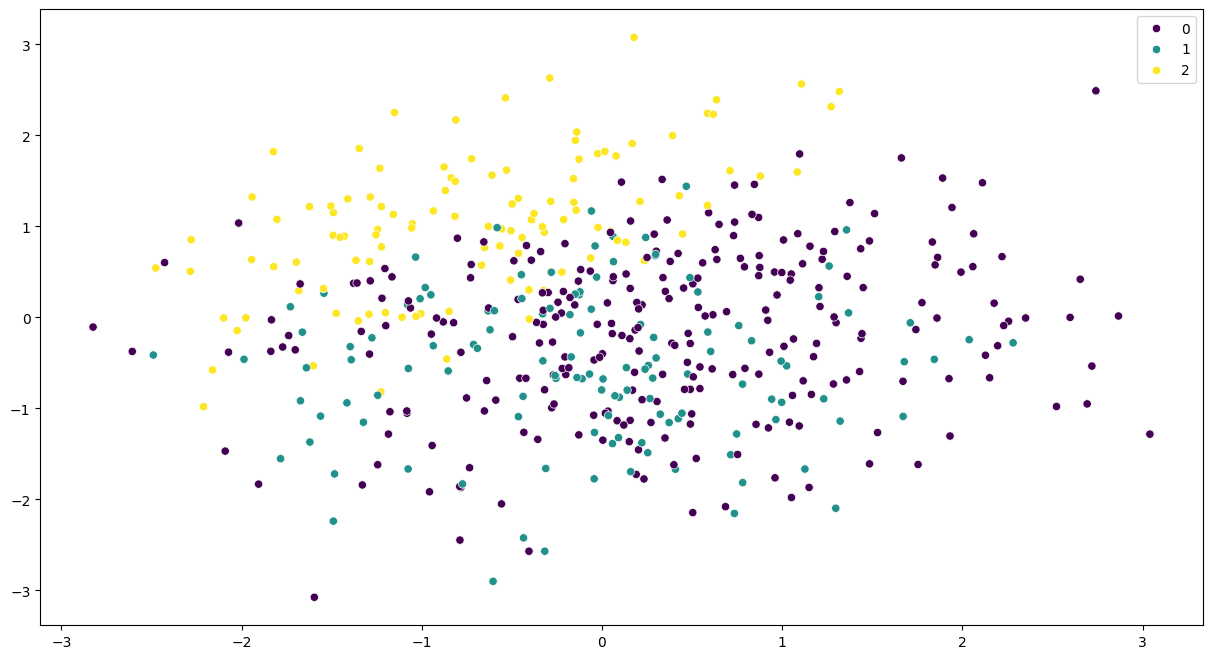

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = agglo_labels, palette = 'viridis')
plt.show()